In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label_binarize
from sklearn import metrics

In [2]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'WenQuanYi Zen Hei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [3]:
## 读取数据
path1 = "datas/winequality-red.csv"
df1 = pd.read_csv(path1, sep=";")
df1['type'] = 1 # 设置数据类型为红葡萄酒

path2 = "datas/winequality-white.csv"
df2 = pd.read_csv(path2, sep=";")
df2['type'] = 2 # 设置数据类型为白葡萄酒

# 合并两个df
df = pd.concat([df1,df2], axis=0)

## 自变量名称
names = ["fixed acidity","volatile acidity","citric acid",
         "residual sugar","chlorides","free sulfur dioxide",
         "total sulfur dioxide","density","pH","sulphates",
         "alcohol", "type"]
## 因变量名称
quality = "quality"

## 显示
df.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
## 异常数据处理
new_df = df.replace('?', np.nan)
datas = new_df.dropna(how = 'any') # 只要有列为空，就进行删除操作
print ("原始数据条数:%d；异常数据处理后数据条数:%d；异常数据条数:%d" % (len(df), len(datas), len(df) - len(datas)))

## 提取自变量和因变量
X = datas[names]
Y = datas[quality]

原始数据条数:6497；异常数据处理后数据条数:6497；异常数据条数:0


In [5]:
## 数据分割
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=1234)

print ("训练数据条数:%d；数据特征个数:%d；测试数据条数:%d" % (X_train.shape[0], X_train.shape[1], X_test.shape[0]))

训练数据条数:4872；数据特征个数:12；测试数据条数:1625


In [6]:
# 2. 数据格式化(归一化)
# 将数据缩放到[0,1]
ss = MinMaxScaler()
X_train = ss.fit_transform(X_train) ## 训练模型及归一化数据

In [7]:
## 查看y值的范围和数理
Y_train.value_counts()

quality
6    2133
5    1610
7     800
4     158
8     143
3      24
9       4
Name: count, dtype: int64

In [8]:
# 3. 模型构建及训练
## penalty: 过拟合解决参数,l1或者l2

## solver: 参数优化方式
### 当penalty为l1的时候，参数只能是：liblinear(坐标轴下降法)；
### 当penalty为l2的时候，参数可以是：lbfgs(拟牛顿法)、newton-cg(牛顿法变种)

## multi_class: 分类方式参数；参数可选: ovr(默认)、multinomial；这两种方式在二元分类问题中，效果是一样的；在多元分类问题中，效果不一样
### ovr: one-vs-rest， 对于多元分类的问题，先将其看做二元分类，分类完成后，再迭代对其中一类继续进行二元分类
### multinomial: many-vs-many（MVM）,对于多元分类问题，如果模型有T类，我们每次在所有的T类样本里面选择两类样本出来，
#### 不妨记为T1类和T2类，把所有的输出为T1和T2的样本放在一起，把T1作为正例，T2作为负例，
#### 进行二元逻辑回归，得到模型参数。我们一共需要T(T-1)/2次分类

## class_weight: 特征权重参数

### Softmax算法相对于Logistic算法来讲，在sklearn中体现的代码形式来讲，主要只是参数的不同而已
## Logistic算法回归(二分类): 使用的是ovr；如果是softmax回归，建议使用multinomial
lr = LogisticRegressionCV(fit_intercept=True, Cs=np.logspace(-5, 1, 100), 
                          multi_class='ovr', penalty='l2', solver='lbfgs')
lr.fit(X_train, Y_train)

/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


LogisticRegressionCV(Cs=array([1.00000000e-05, 1.14975700e-05, 1.32194115e-05, 1.51991108e-05,
       1.74752840e-05, 2.00923300e-05, 2.31012970e-05, 2.65608778e-05,
       3.05385551e-05, 3.51119173e-05, 4.03701726e-05, 4.64158883e-05,
       5.33669923e-05, 6.13590727e-05, 7.05480231e-05, 8.11130831e-05,
       9.32603347e-05, 1.07226722e-04, 1.23284674e-04, 1.41747416e-04,
       1.62975083e-04, 1.87...
       4.03701726e-01, 4.64158883e-01, 5.33669923e-01, 6.13590727e-01,
       7.05480231e-01, 8.11130831e-01, 9.32603347e-01, 1.07226722e+00,
       1.23284674e+00, 1.41747416e+00, 1.62975083e+00, 1.87381742e+00,
       2.15443469e+00, 2.47707636e+00, 2.84803587e+00, 3.27454916e+00,
       3.76493581e+00, 4.32876128e+00, 4.97702356e+00, 5.72236766e+00,
       6.57933225e+00, 7.56463328e+00, 8.69749003e+00, 1.00000000e+01]),
                     multi_class='ovr')

In [9]:
# 4. 模型效果获取
r = lr.score(X_train, Y_train)
print("R值：", r)
print("特征稀疏化比率：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100))
print("参数：",lr.coef_)
print("截距：",lr.intercept_)
print("概率：", lr.predict_proba(X_test)) # 获取sigmoid函数返回的概率值

R值： 0.5402298850574713
特征稀疏化比率：0.00%
参数： [[ 8.79459213e-06  2.70850390e-05 -3.77706152e-06 -1.81782340e-06
   9.07808012e-06 -2.60587218e-06  1.29510559e-07  9.27010435e-06
   6.83045371e-06 -6.13679664e-06 -1.09618748e-05 -1.14558812e-05]
 [ 8.78448842e-01  5.74137311e+00 -1.83088405e+00 -2.94319941e+00
   9.66522057e-01 -6.16613198e+00 -8.84063535e-01  2.03667389e+00
   7.87669502e-01 -1.64740533e-01 -1.71828531e+00  2.96326560e+00]
 [-2.26161044e+00  4.29680713e+00  1.39131238e+00 -2.98213202e+00
  -2.59203018e-01 -1.66776438e+00  2.42105740e+00  3.15489284e+00
  -1.37088439e+00 -2.97744540e+00 -4.68100635e+00 -3.07732749e-01]
 [-2.25531887e-01 -4.03800557e+00 -1.06003167e+00  7.05198309e-02
   5.72881090e-01  7.51571557e-01 -7.64722075e-01  1.12671779e+00
  -1.66986248e-01  1.48563277e-01  1.25164357e+00 -1.67083220e-01]
 [ 2.78175380e+00 -5.00168838e+00 -4.85309318e-01  3.03363737e+00
  -4.03167187e+00  1.44599922e+00 -1.60812523e+00 -3.38073206e+00
   1.81229894e+00  3.51728983e+

/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


In [10]:
print("概率：", lr.predict_proba(X_test).shape) # 获取sigmoid函数返回的概率值

概率： (1625, 7)


/share/anaconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


In [11]:
# 数据预测
## a. 预测数据格式化(归一化)
X_test = ss.transform(X_test) # 使用模型进行归一化操作
## b. 结果数据预测
Y_predict = lr.predict(X_test)

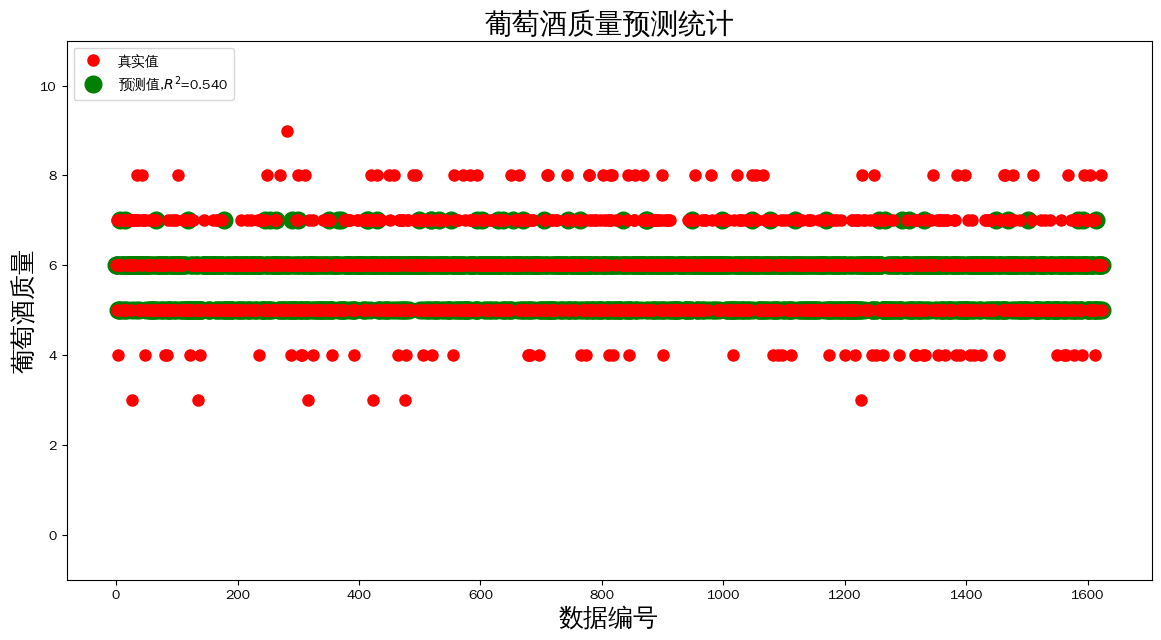

In [12]:
## c. 图表展示
x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(-1,11)
plt.plot(x_len, Y_test, 'ro',markersize = 8, zorder=3, label=u'真实值')
plt.plot(x_len, Y_predict, 'go', markersize = 12, zorder=2, label=u'预测值,$R^2$=%.3f' % lr.score(X_train, Y_train))
plt.legend(loc = 'upper left')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'葡萄酒质量', fontsize=18)
plt.title(u'葡萄酒质量预测统计', fontsize=20)
plt.show()